In [1]:
import os

In [2]:
from pathlib import Path

In [3]:
from imutils import paths

In [4]:
from cv2 import imread

In [5]:
import numpy as np

In [6]:
import pandas as pd

C:\Users\radha\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\radha\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [7]:
from sklearn.utils import shuffle

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
from sklearn.metrics import classification_report

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
import scikitplot as skplt

In [15]:
from sklearn import metrics

In [16]:
import tensorflow

In [17]:
from tensorflow.keras.layers import Input

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

In [20]:
from tensorflow.keras.layers import Dropout

In [21]:
from tensorflow.keras.layers import Flatten

In [22]:
from tensorflow.keras.layers import Dense

In [23]:
from tensorflow.keras.layers import Input

In [24]:
from tensorflow.keras.layers import BatchNormalization

In [25]:
from tensorflow.keras import Sequential

In [26]:
from tensorflow.keras.optimizers import Adam

In [27]:
from tensorflow.keras.preprocessing.image import img_to_array

In [28]:
from tensorflow.keras.preprocessing.image import load_img

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
from tensorflow.keras.models import Model

In [31]:
data = []
labels = []
width,height=150,150

In [32]:
image_dir = Path('./Dataset')

In [33]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [34]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

In [35]:
image_df = pd.concat([filepaths, labels], axis=1)

In [36]:
image_df = image_df.sample(frac=1).reset_index(drop = True)

In [37]:
image_df.head()

,Filepath,Label
0,Dataset\No_DR\0f6e645466a2.png,No_DR
1,Dataset\No_DR\a0fd94e2ad76.png,No_DR
2,Dataset\Mild\45e4b7eada54.png,Mild
3,Dataset\Moderate\23148a40ecb0.png,Moderate
4,Dataset\Moderate\85cc6d636898.png,Moderate


In [38]:
image_df.sample(5)

,Filepath,Label
1212,Dataset\Moderate\eae901557a84.png,Moderate
677,Dataset\No_DR\91f3c4c1e72b.png,No_DR
195,Dataset\Moderate\a879c3569552.png,Moderate
1610,Dataset\No_DR\6c30dd481717.png,No_DR
1220,Dataset\No_DR\fc898dfeb24f.png,No_DR


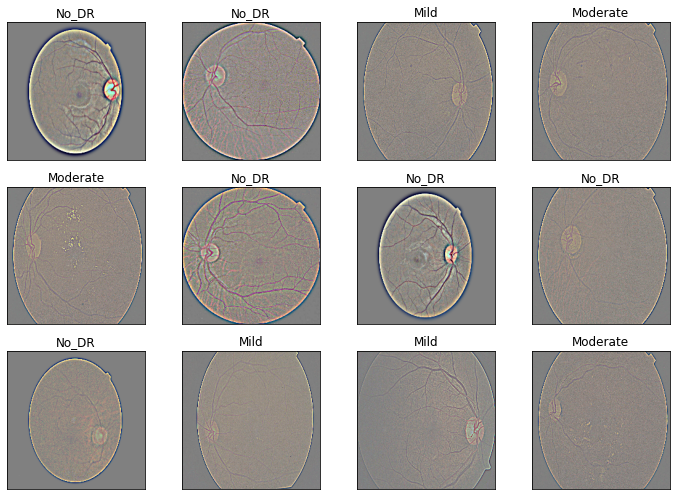

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

C:\Users\radha\AppData\Local\Temp\ipykernel_4316\4261523045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


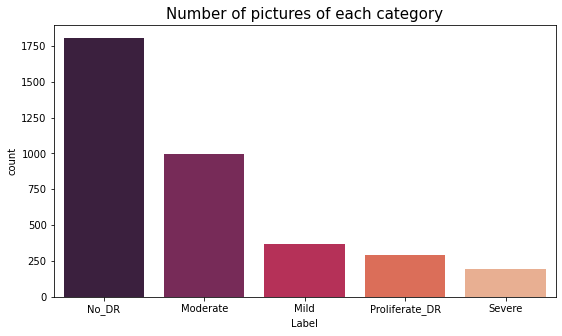

In [40]:
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [41]:
imagePaths = list(paths.list_images('./Dataset'))

In [42]:
data = []
labels = []
width,height=150,150

In [43]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

In [44]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [45]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [46]:
data, labels = shuffle(data, labels)

In [47]:
print(data.shape)
print(labels.shape)

(3662, 150, 150, 3)
(3662, 5)


In [48]:
test_ratio = 0.25

In [49]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

In [50]:
print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2746, 150, 150, 3)
Test images: (916, 150, 150, 3)
Train label: (2746, 5)
Test label: (916, 5)


In [51]:
learning_rate = 1e-4
number_of_epochs = 5
BatchSize = 32

In [52]:
def create_model():
    model=Sequential()
    model.add(Conv2D(16, (3, 3),activation='relu',input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, (3, 3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, (3, 3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Flatten())  
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(5, activation='sigmoid'))

    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
model = create_model()

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [55]:
history = model.fit(x_train,y_train,epochs=number_of_epochs)

Epoch 1/5
86/86 [==============================] - 14s 153ms/step - loss: 0.3186 - accuracy: 0.6606
Epoch 2/5
86/86 [==============================] - 14s 163ms/step - loss: 0.2583 - accuracy: 0.7232
Epoch 3/5
86/86 [==============================] - 15s 178ms/step - loss: 0.2483 - accuracy: 0.7400
Epoch 4/5
86/86 [==============================] - 15s 175ms/step - loss: 0.2385 - accuracy: 0.7418
Epoch 5/5
86/86 [==============================] - 15s 174ms/step - loss: 0.2278 - accuracy: 0.7578


In [56]:
test_preds = model.predict(x_test, batch_size=BatchSize)
test_preds = np.argmax(test_preds, axis=1)

29/29 [==============================] - 2s 50ms/step


In [57]:
train_preds = model.predict(x_train, batch_size=BatchSize)
train_preds = np.argmax(train_preds, axis=1)

86/86 [==============================] - 4s 48ms/step


In [58]:
train_acc_score=accuracy_score(train_preds,y_train.argmax(axis=1))*100
test_acc_score=accuracy_score(test_preds,y_test.argmax(axis=1))*100

In [59]:
print("\nTrainig Accuracy Score:-",train_acc_score)
print("\nTesting Accuracy Score:-",test_acc_score)


Trainig Accuracy Score:- 36.380189366351054

Testing Accuracy Score:- 36.681222707423586


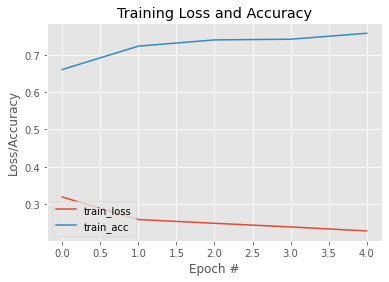

In [60]:
N = number_of_epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

In [61]:
extract_feature_model = Model(model.inputs, model.layers[-4].output)

In [62]:
features_train  = extract_feature_model.predict(x_train)  

86/86 [==============================] - 4s 47ms/step


In [63]:
features_test = extract_feature_model.predict(x_test)  

29/29 [==============================] - 1s 46ms/step


In [64]:
print(features_train.shape)

(2746, 1024)


In [65]:
from sklearn.svm import SVC

In [66]:
svm = SVC(kernel='linear')
svm.fit(features_train,np.argmax(y_train,axis=1))

SVC(kernel='linear')

In [67]:
train_svm_score=svm.score(features_train,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",train_svm_score)

SVM Training Accuracy Score:- 96.75892206846322


In [68]:
test_svm_score=svm.score(features_test,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",test_svm_score)


SVM Testing Accuracy Score:- 67.90393013100436


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(features_train,np.argmax(y_train,axis=1))

In [71]:
train_dt_score=clf.score(features_train,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",train_dt_score)

Decision Tree Training Accuracy Score:- 99.27166788055352


In [72]:
test_dt_score=clf.score(features_test,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",test_dt_score)


Decision Tree Testing Accuracy Score:- 63.1004366812227


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train,np.argmax(y_train,axis=1))

KNeighborsClassifier()

In [75]:
train_knn_score=knn.score(features_train,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",train_knn_score)

KNN Training Accuracy Score:- 80.08011653313912


In [76]:
test_knn_score=knn.score(features_test,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",test_knn_score)


KNN Testing Accuracy Score:- 71.61572052401746


In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb = GaussianNB()
gnb.fit(features_train,np.argmax(y_train,axis=1))

GaussianNB()

In [79]:
train_nb_score=gnb.score(features_train,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",train_nb_score)


GaussianNaive Bayes Training Accuracy Score:- 53.641660597232345


In [80]:
test_nb_score=gnb.score(features_test,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",test_nb_score)


GaussianNaive Bayes Testing Accuracy Score:- 53.493449781659386


In [81]:
print("--Training Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(train_acc_score))
print("SVM Accuracy:- {:.2f} %".format(train_svm_score))
print("DT Accuracy:- {:.2f} %".format(train_dt_score))
print("KNN Accuracy:- {:.2f} %".format(train_knn_score))
print("NB Accuracy:- {:.2f} %".format(train_nb_score))

--Training Accuracy..
CNN Accuracy:- 36.38 %
SVM Accuracy:- 96.76 %
DT Accuracy:- 99.27 %
KNN Accuracy:- 80.08 %
NB Accuracy:- 53.64 %


In [82]:
print("\n--Testing Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(test_acc_score))
print("SVM Accuracy:- {:.2f} %".format(test_svm_score))
print("DT Accuracy:- {:.2f} %".format(test_dt_score))
print("KNN Accuracy:- {:.2f} %".format(test_knn_score))
print("NB Accuracy:- {:.2f} %".format(test_nb_score))


--Testing Accuracy..
CNN Accuracy:- 36.68 %
SVM Accuracy:- 67.90 %
DT Accuracy:- 63.10 %
KNN Accuracy:- 71.62 %
NB Accuracy:- 53.49 %
